In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Data.csv')
df.head()

,X1,X2,Y
0,13,7,1
1,73,10,0
2,80,22,0
3,41,89,1
4,100,25,0


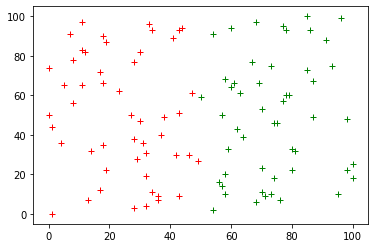

In [3]:
X1 = df["X1"].values.tolist()
X2 = df["X2"].values.tolist()
Y = df["Y"].values.tolist()

for i in range(len(Y)):
    if Y[i] == 0:
        plt.plot(X1[i], X2[i], "g+")
    else:
        plt.plot(X1[i], X2[i], "r+")

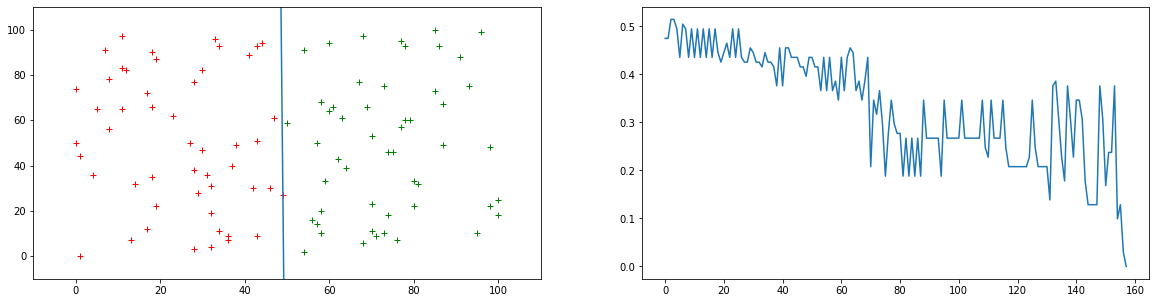

In [4]:
import matplotlib.pyplot as plt
import numpy as np 
import random
import math
from IPython import display
from scipy.signal import savgol_filter

W = [random.random(), random.random()]
b= random.random()

lr = 0.01
theta = 0.5
epoch = 0
count = 0

loss = []

while count <len(X1):
    total_error = 0
    for i in range(len(Y)):
        weighted_sum = W[0]*X1[i] +W[1]*X2[i] +b

        pred = 0
        if weighted_sum>theta:
            pred= 1

        error = Y[i]-pred
        if error != 0:
            count = 0
            total_error += math.sqrt(error**2)
            W[0] = W[0]+ error*X1[i]*lr
            W[1] += error*X1[i]*lr
            b    += error*lr
        else:
            count +=1
        
    loss.append(1/len(X1)*total_error)
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1) 
    display.clear_output(wait= True) 
    for i in range(len(Y)):
        if Y[i] == 0:
            plt.plot(X1[i], X2[i], "g+")
        else:
            plt.plot(X1[i], X2[i], "r+")
        
        plt.xlim([-10, 110])
        plt.ylim([-10, 110])

        xintr = (theta-b)/W[0]
        yintr = (theta-b)/W[1]

        slope = -yintr/xintr

        xx =plt.xlim()
    yy= []
    for x in xx:
        yy.append(slope*x+yintr)
    plt.plot(xx,yy)

    
    plt.subplot(1,2,2) #multiple figure(1roe 2column index_value)
    plt.plot(loss)
    plt.show()
    epoch +=1
    
    